In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import skimage.io
import time
import cv2
import requests
from io import BytesIO


# Write your imports here

# Linear Algebra Exercise
## Vectors, Matrices, Transformations. Applications of Linear Algebra

### Problem 1. Basis Vectors in 2D Coordinate Space
We know that for an n-dimensional vector space, we need **exactly n** vectors to form a basis. Let's visualize that.

The function you wrote last time for visualizing complex numbers can be extended to visualize any set of vectors. If you haven't already written that, have a look at [this StackOverflow post](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib). You need to use the `quiver()` function. Pay attention to its parameters so you use it correctly!

Write a function which accepts an array of vectors in the format `[start_x, start_y, end_x, end_y]` and plots them. Optionally, you can add different colors. When you call `quiver()` pass `color = colors` as the last parameter and it will take care of them.

Make sure to leave enough space on the axes. `quiver()` doesn't resize the plot area automatically to fit everything. You can do this manually. A simple `plt.xlim(-10, 10)` and `plt.ylim(-10, 10)` will do the job but you can do much better if you wish :).

In [3]:
def plot_vectors(vectors, colors):
    """
    Plots vectors on the xy-plane. The `vectors` parameter is a Python list.
    Each vector is specified in the format [start_x, start_y, end_x, end_y]
    """
    vectors_array = np.array(vectors)
    start_x, start_y, end_x, end_y = vectors_array[:, 0], vectors_array[:, 1], vectors_array[:, 2], vectors_array[:, 3]
    
    plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, color=colors, scale_units="xy", angles="xy", scale=1)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.gca().set_aspect("equal")
    plt.show()


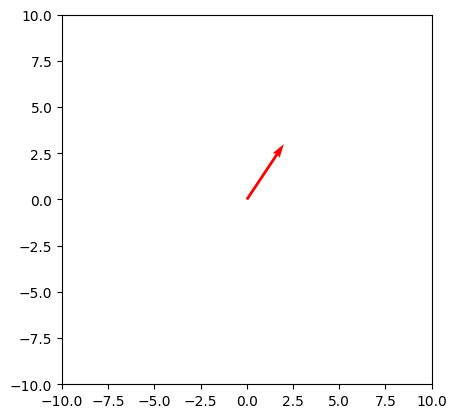

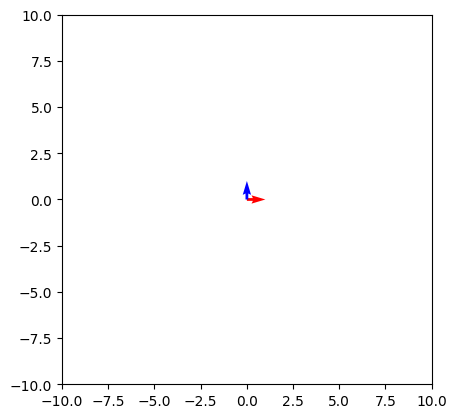

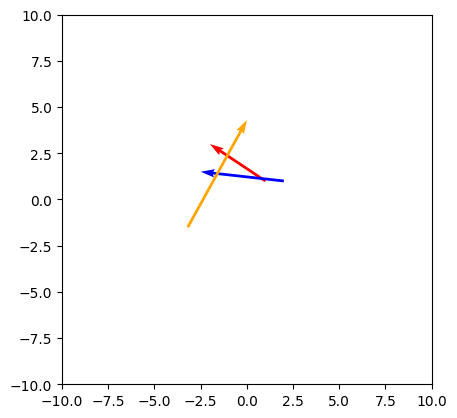

In [4]:
plot_vectors([[0, 0, 2, 3]], ["red"]) # One vector
plot_vectors([[0, 0, 1, 0], [0, 0, 0, 1]], ["red", "blue"]) # Two orthogonal vectors
plot_vectors([[1, 1, -2, 3], [2, 1, -2.5, 1.5], [-3.2, -1.5, 0, 4.3]], ["red", "blue", "orange"]) # Three arbitrary vectors

We know that any 2 linearly independent vectors can form a basis in 2D space. This means that every other vector can be represented as their linear combination. It will be easiest to see this in the standard basis of 2D space.

We start by defining the two basis vectors: $e_1, e_2$. Then, we choose an arbitrary vector $v$. We know that it can be expressed as a linear combination $$ v = \lambda_1e_1 + \lambda_2e_2 $$

Finding the unknown coefficients is the same as solving a linear system with as many equations as there are basis vectors (2 in this case). We can do this by using `np.linalg.solve()`.

**Note:** If you want to write `lambda` in Python for some reason, use the variable name `lamda` since `lambda` is a reserved keyword.

Coefficients: [3.5 8.6]


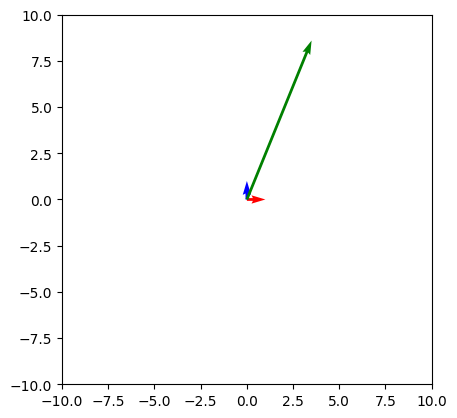

In [5]:
def find_linear_combination_coefficients(e1, e2, v):
    """
    Returns the coordinates of the representation of v in the basis {e_1, e_2}.
    That is, the unknown coefficients in the linear combination v = lambda_1 * e_1 + lambda_2 * e_2
    """
    coefficients = np.linalg.solve(np.array([e1, e2]).T, v)
    return coefficients

# Define basis vectors and arbitrary vector v
e1 = [1, 0]
e2 = [0, 1]
v = [3.5, 8.6]

# Find the unknown coefficients
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients:", coefficients)

# Plot the three vectors
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Coefficients:  [3.5 8.6]


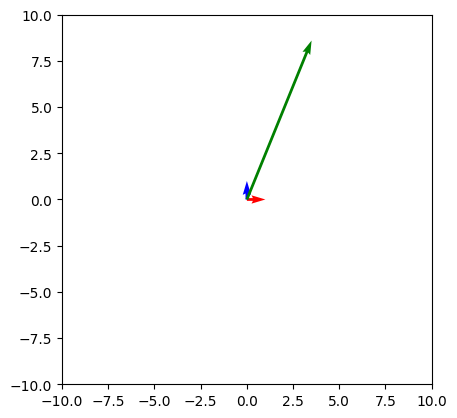

In [6]:
e1, e2 = [[1, 0], [0, 1]]
v = [3.5, 8.6]
# Find the unknown coefficients. Extract the logic in a function.
# It should accept the two basis vectors and the one we need to represent
# and should return the two coefficients
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
# Plot the three vectors
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

The coefficents should be the same as the vector's coordinates. That's because we were extremely careful in choosing a basis.

We know, however, that any pair of linearly independent vectors forms a basis in 2D space. So, let's try this.

Choose two arbitrary vectors (in the code they are `[2, 3]` and `[-5, 1]` but feel free to change them as you wish). Represent $v$ as their linear combination and print the coefficients. After that, plot the resulting vectors to verify visually that the third one is the linear combination of the other two with the coefficients that you saw.

Coefficients:  [2.73529412 0.39411765]


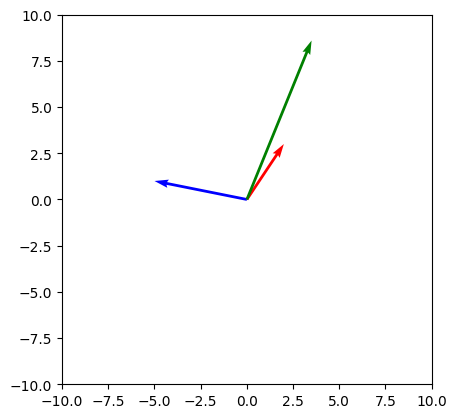

In [7]:
e1, e2 = [[2, 3], [-5, 1]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

What we did was **changing the basis**. We represented **the same original vector $v$** in the new coordinates. We didn't change the geometric object $v$ itself; it still looks the same in the plot. We only changed our viewpoint. This is what change of basis is all about: changing viewpoints.

Let's also see what an "orthogonal" basis is: the basis vectors are orthogonal to each other. You can find online how to compute orthogonal vectors but we don't need that. A definition of orthogonal vectors is: a set of two vectors $a, b$ such that $a.b = 0$. One such set of vectors is `[3, 4], [-4, 3]`.

Represent the same vector $v$ in the orthogonal basis.

Coefficients:  [1.796 0.472]


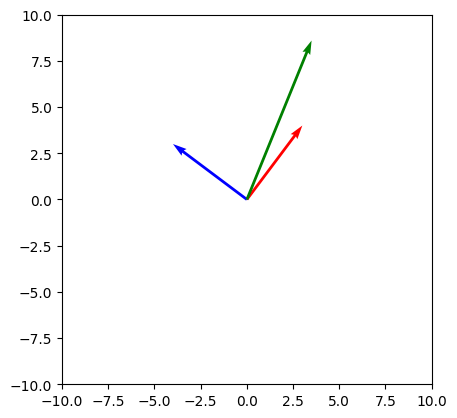

In [8]:
e1, e2 = [[3, 4], [-4, 3]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Let's choose a more visually pleasing basis: one whose basis vectors are **collinear** (parallel) to the coordinate axes.

Coefficients:  [1.72  0.875]


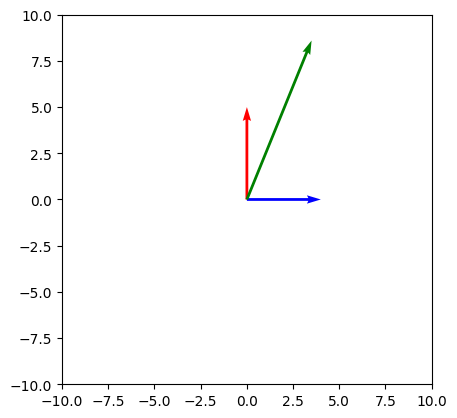

In [9]:
e1, e2 = [[0, 5], [4, 0]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Now you've seen the coordinates of $v$ in different **bases** (plural form of "basis"). You can see that algebra doesn't really care what the basis vectors are. We simply need *some* point of reference.

You can also see the transition from an arbitrary basis, to an orthogonal basis, to an orthonormal basis, to the standard basis (which is orthonormal **AND** aligned to the xy axes). You can also see that the standard basis gives us the easiest possible representation of a vector. That's why it's so useful.

### Problem 2. Vectorization in `numpy`
As programmers, we're used to writing for-loops to iterate over collections. This is quite OK but in Python makes the code slow (because it's an interpreted, dynamically-typed language). For example, a "standard" way of summing an array would be
```python
x = [2, 3, 8, -2.3, 0, 15]
python_sum = 0
for i in range(len(x)):
    python_sum += x[i]
print(python_sum)
```

However, there are better ways to do this. `numpy` works in C "behind the scenes". This means that:
1. Operations in C are very, very, VERY fast
2. Communication between C and Python is slow

This means we should prepare our code to use `numpy` arrays as much as possible. First of all, this gives us a great computational advantage: the code is very fast. Second, it will look simpler and more beautiful. Compare the previous code with this one:
```python
x = [2, 3, 8, -2.3, 0, 15]
numpy_sum = np.sum(x)
print(numpy_sum)
```

Of course, the for-loop is still done, it's just hidden.

The basic rule is **whenever possible, avoid looping and use vectors and matrices**. Sometimes it's impossible to avoid loops and that's OK.

Let's create a performance test. Create a large array of random numbers. You can use `np.random.random()`. Sum the array using `numpy` and using the for-loop. Compare the times. In some cases, the performance difference will be several hundred times (e.g. length = $1.10^7$, difference $\approx 2000$ times: $\approx 0.01ms$ for the `sum()` and $\approx 2s$ for the loop).

Don't forget to see that the sums are equal. A fast but incorrect algorihm is not an option :).

Next, call the function for different lengths and create two plots showing the time it takes to multiply different-length arrays. **Idea:** You can plot them on two separate y-axes on the same plot. Look at the `twiny()` function. See how much time it takes to perform both operations.

Plot another plot: speedup versus length. Plot the length on the x-axis and the speedup (`np_sum_time / for_loop time`) on the y-axis.

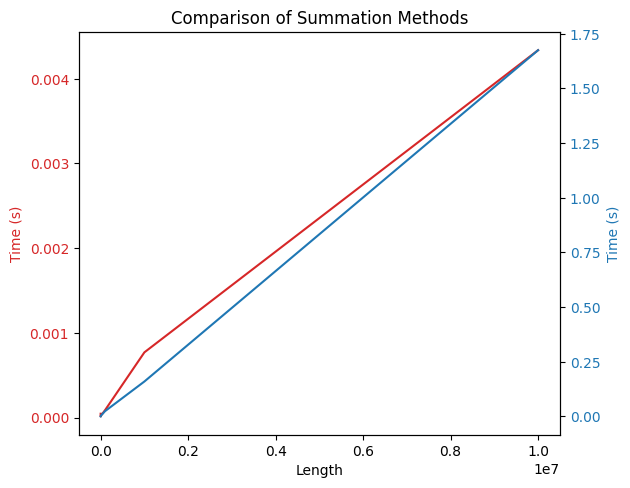

In [10]:
# Write your code here

def numpy_sum_performance(length):
    x = np.random.random(length)
    start_time = time.time()
    numpy_sum = np.sum(x)
    end_time = time.time()
    return end_time - start_time

def loop_sum_performance(length):
    x = np.random.random(length)
    start_time = time.time()
    python_sum = 0
    for i in range(length):
        python_sum += x[i]
    end_time = time.time()
    return end_time - start_time

# Test the performance for different lengths
lengths = [10**i for i in range(1, 8)]
numpy_times = []
loop_times = []

for length in lengths:
    numpy_times.append(numpy_sum_performance(length))
    loop_times.append(loop_sum_performance(length))

# Plotting
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Length')
ax1.set_ylabel('Time (s)', color=color)
ax1.plot(lengths, numpy_times, color=color, label='NumPy Sum Time')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Time (s)', color=color)
ax2.plot(lengths, loop_times, color=color, label='Loop Sum Time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Comparison of Summation Methods')
plt.show()

There's one slight warning to using vectors. If we don't know what we're doing we might get very hard-to-detect bugs.

Let's look at vector multiplication. In algebra we may write:
$$ \begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}.
 \begin{bmatrix}
5 \\
-2 \\
3
\end{bmatrix}=16$$

This is the same as
$$ \begin{bmatrix}
2 & 3 & 4
\end{bmatrix}.
 \begin{bmatrix}
5 & -2 & 3
\end{bmatrix}=16$$

In vector multiplication, rows and columns don't really matter. However, most of the time we want to use **the matrix convention**: "rows times columns". This means that both products above are undefined. Also, the inner product is
$$ \begin{bmatrix}
2 & 3 & 4
\end{bmatrix}
.
 \begin{bmatrix}
5 \\
-2 \\
3
\end{bmatrix}=16$$

The inverse operation, following our convention, will return a matrix (this is called **outer product**):

$$ \begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}.
 \begin{bmatrix}
5 & -2 & 3
\end{bmatrix}=
\begin{bmatrix}
10 & -4 & 6 \\
15 & -6 & -9 \\
20 & -8 & 12
\end{bmatrix}$$

Let's compare how the default `numpy` behaviour does and how we can impose our convention.

First, let's create the arrays. Next, multiply them. Everything should look fine... until we look at the shapes of `x` and `y` which are `(3,)`. This kind of array is called **rank-1 array**. The matrix convention **DOES NOT** apply to it. One big error is evident when we try to transpose them.

In [11]:
x = np.array([2, 3, 4])
y = np.array([5, -2, 3])
print("x.y =", str(x.dot(y)))

print("x.shape:", x.shape)
print("y.shape:", y.shape)
print("x:", x)
print("x transpose:", x.T)

x.y = 16
x.shape: (3,)
y.shape: (3,)
x: [2 3 4]
x transpose: [2 3 4]


Transposition **DID NOT** turn our row-vector into a column vector! This is correct but **does not follow the matrix convention**.

How do we follow the matrix convention then? Simple, just represent the vectors as matrices (2D arrays).

In [12]:
x = np.array([[2, 3, 4]]) # Row vector
y = np.array([[5], [-2], [3]]) # Column vector

print("x.shape:", x.shape)
print("y.shape:", y.shape)
print("x.y:\n", x.dot(y)) # Dot product -> still looks like a matrix
print("y.x:\n", y.dot(x)) # Outer product -> matrix

x.shape: (1, 3)
y.shape: (3, 1)
x.y:
 [[16]]
y.x:
 [[10 15 20]
 [-4 -6 -8]
 [ 6  9 12]]


This simple convention can save us a lot of trouble in the future, especially when dealing with more complicated code.

### Problem 3. Visualizing Linear Transformations
Write a code which visualizes a linear transformation. It should show "the old space" and "the new space" imposed on it.

Actually, if you don't want to write the code, I've already provided something for you. The following cell contains the `visualize_transform.py` code from last time. We'll examine it and see how we can use it to show our own transformations.

In [13]:
def visualize_transformation(matrix, plot_title):
    fig = plt.figure()
    plt.axis("equal")
    ax = fig.add_subplot(111)

    # Limits, labels and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors
    ax.quiver([0, 0], [0, 0], [1, 0], [0, 1], color = ["red", "blue"], alpha = 0.2, units = "xy", scale = 1)

    # Transformation
    matrix = [
        [matrix[0][0], matrix[0][1], 0],
        [matrix[1][0], matrix[1][1], 0],
        [0, 0, 1],
    ]
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

    # New (transformed) grid lines
    # Horizontal
    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color = "red", linestyle = "--", linewidth = 2, transform = t + ax.transData)
    # Vertical
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color = "blue", linestyle = "--", linewidth = 2, transform = t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    ax.quiver([0, 0], [0, 0], [new_x[0], new_y[0]], [new_x[1], new_y[1]], color = ["red", "blue"], units = "xy", angles = "xy", scale = 1)
   
    plt.show()

The code is mostly "housekeeping" - making the plot look nicer. It basically consits of several parts:
1. Visualize gridlines
2. Create the transformation from the matrix: `t = Affine2D(matrix)`
3. Visualize transformed gridlines

A quirk with `Affine2D()` is that it uses a 3x3 matrix. What's more, the last row is always `[0, 0, 1]`. This is because the third column corresponds to moving (translation) of the entire coordinate system. As you can imagine, this doesn't leave the origin fixed, therefore **translation is not a linear transformation**. It's an affine transformation, which is exactly what the code does. More info [here](https://stackoverflow.com/questions/10698962/why-do-2d-transformations-need-3x3-matrices).
For our purposes, we defined the 2D transformation matrix as:
$$ T=\begin{bmatrix}
a & b \\
c & d
\end{bmatrix} $$
which we'll pass to the function as
$$ T=\begin{bmatrix}
a & b & 0 \\
c & d & 0 \\
0 & 0 & 1
\end{bmatrix} $$

**Note:** If you want to visualize translations, feel free to do so.

Let's see what various transformations look like.

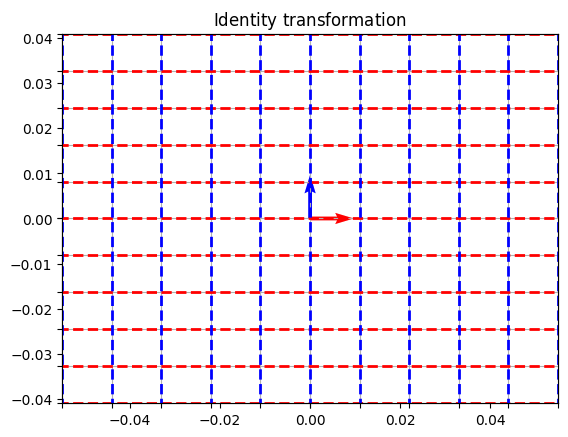

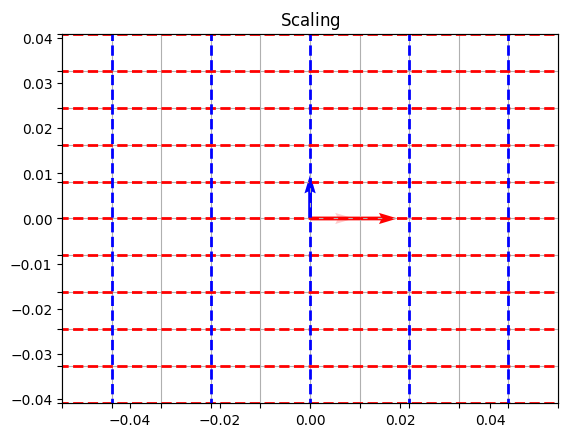

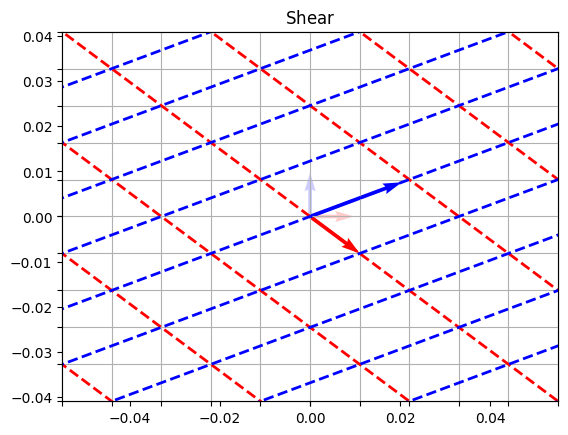

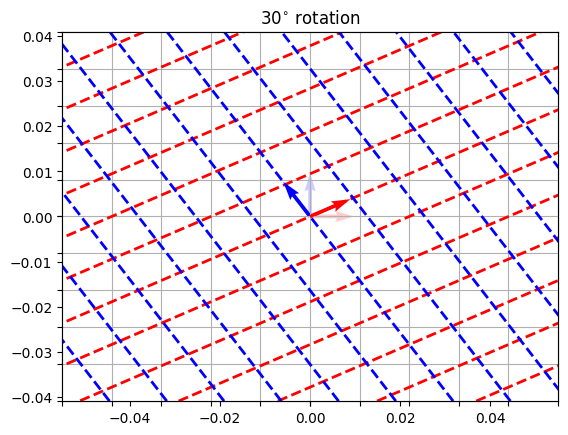

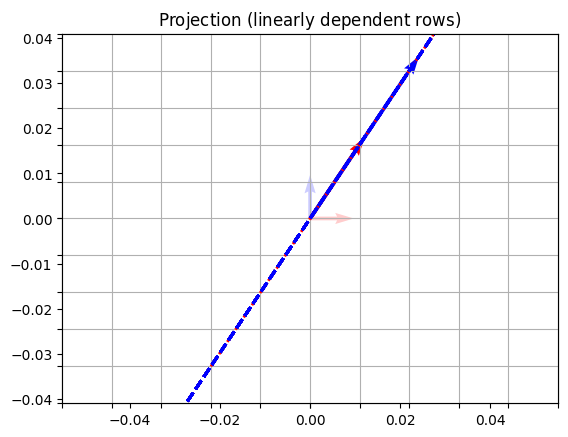

In [14]:
# Identity
matrix = [
    [1, 0],
    [0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Identity\ transformation}$")

# Scaling
matrix = [
    [2, 0],
    [0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Scaling}$")

# Shear
matrix = [
    [1, 2],
    [-1, 1]
]

visualize_transformation(matrix, r"$\mathrm{Shear}$")

# Rotation
matrix = [
    [np.cos(np.radians(30)), -np.sin(np.radians(30))],
    [np.sin(np.radians(30)), np.cos(np.radians(30))]
]

visualize_transformation(matrix, r"$\mathrm{30^{\circ}\ rotation}$")

# Projection (linearly dependent rows)
matrix = [
    [1, 2],
    [2, 4]
]

visualize_transformation(matrix, r"$\mathrm{Projection\ (linearly\ dependent\ rows)}$")

Feel free to experiment with other matrices and to see what transformation they will result in. Also feel free to write better visualization code.

In [15]:
# Write your code here

def visualize_transformation(matrix, plot_title):
    fig, ax = plt.subplots()
    ax.set_aspect("equal")

    # Limits, labels, and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(-5, 6))
    ax.set_yticks(np.arange(-5, 6))
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors
    ax.quiver([0, 0], [0, 0], [1, 0], [0, 1], color=["red", "blue"], alpha=0.2, units="xy", scale=1)

    # Transformation
    matrix = np.array([
        [matrix[0][0], matrix[0][1], 0],
        [matrix[1][0], matrix[1][1], 0],
        [0, 0, 1],
    ])
    t = Affine2D(matrix)

    # New (transformed) grid lines
    min_x, max_x = ax.get_xlim()
    min_y, max_y = ax.get_ylim()
    for y in np.arange(min_y, max_y + 1):
        ax.plot([min_x, max_x], [y, y], color="red", linestyle="--", linewidth=2, transform=t + ax.transData)
    for x in np.arange(min_x, max_x + 1):
        ax.plot([x, x], [min_y, max_y], color="blue", linestyle="--", linewidth=2, transform=t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    ax.quiver([0, 0], [0, 0], [new_x[0], new_y[0]], [new_x[1], new_y[1]], color=["red", "blue"], units="xy", angles="xy", scale=1)

    plt.show()

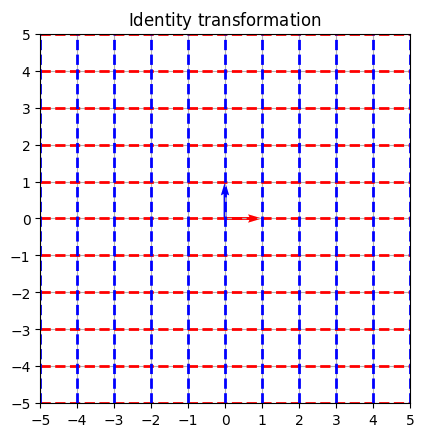

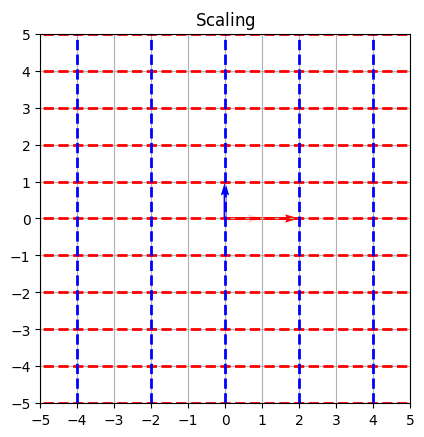

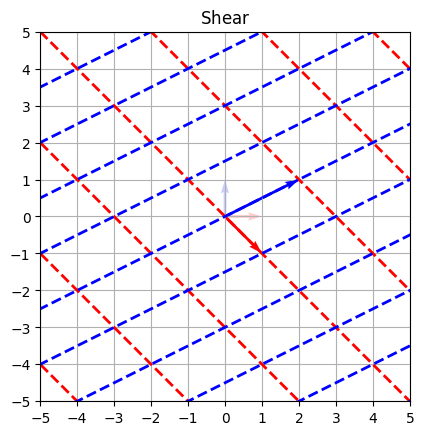

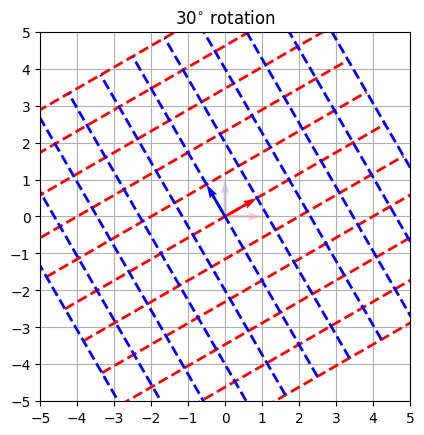

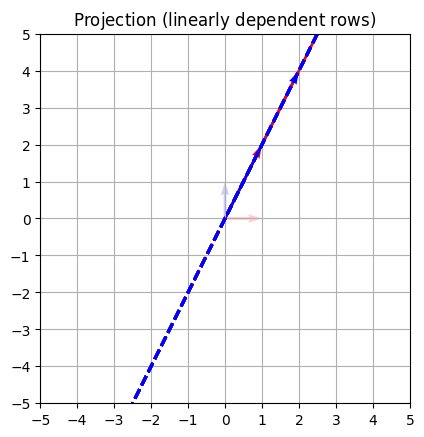

In [16]:
# Identity
matrix = [
    [1, 0],
    [0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Identity\ transformation}$")

# Scaling
matrix = [
    [2, 0],
    [0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Scaling}$")

# Shear
matrix = [
    [1, 2],
    [-1, 1]
]

visualize_transformation(matrix, r"$\mathrm{Shear}$")

# Rotation
matrix = [
    [np.cos(np.radians(30)), -np.sin(np.radians(30))],
    [np.sin(np.radians(30)), np.cos(np.radians(30))]
]

visualize_transformation(matrix, r"$\mathrm{30^{\circ}\ rotation}$")

# Projection (linearly dependent rows)
matrix = [
    [1, 2],
    [2, 4]
]

visualize_transformation(matrix, r"$\mathrm{Projection\ (linearly\ dependent\ rows)}$")

### Problem 4. Images as Matrices. Image arithmetic
One direct use of matrices and transformations is images. An image is a 2D array (i.e. matrix) of pixels. If it's grayscale, each pixel will be an integer from 0 to 255:
$$ I=\begin{bmatrix}
20 & 45 & 83 & \dots \\
38 & 182 & 200 & \dots \\
\dots & \dots & \dots & \dots \\
\end{bmatrix} $$

In an RGB image, each pixel contains three values, corresponding to $R$, $G$ and $B$.

A bigger number means more brightness in the corresponding channel, for example `[255, 0, 0]` is a completely red pixel. `[0, 0, 0]` is a black pixel, and `[255, 255, 255]` is a white pixel.

Because we treat images as matrices, we can peform arithmetic operations on them.

To show an image, you can use `plt.imshow()`.

#### Opening an image from the Internet
This one proves not to be easy. However, there's a library for working with images called `scikit-image` which solves most of our problems. Even better, it returns a `numpy` array, which is perfect for us.

In [17]:
def read_image(url):
    img = skimage.io.imread(url)
    return img

In [18]:
cat_image_url = "https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/140272627-grooming-needs-senior-cat-632x475.jpg"
cat_image = read_image(cat_image_url)

In [19]:
cat_image[0][0] # First pixel

array([35, 55,  4], dtype=uint8)

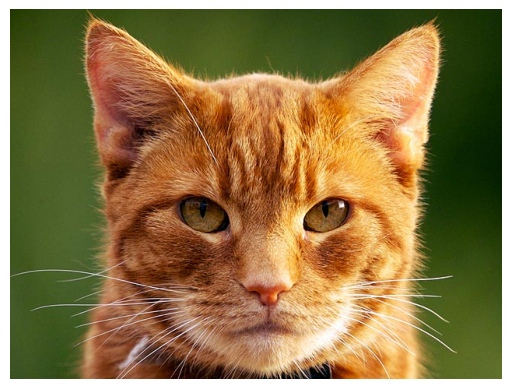

In [20]:
plt.imshow(cat_image)
plt.axis("off")
plt.show()

In most cases, it's useful to treat the channels one by one.

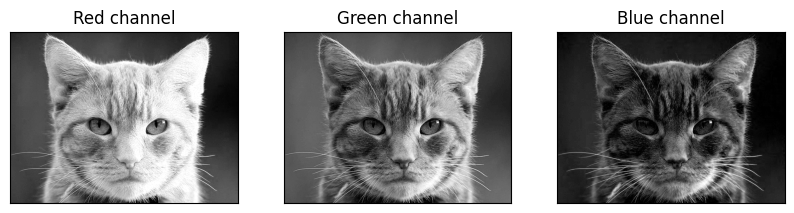

In [21]:
cat_image_r, cat_image_g, cat_image_b = [cat_image[:, :, i] for i in range(3)]
f, (ax_r, ax_g, ax_b) = plt.subplots(1, 3, figsize = (10, 5))
ax_r.imshow(cat_image_r, cmap = "gray")
ax_r.set_title("Red channel")
ax_g.imshow(cat_image_g, cmap = "gray")
ax_g.set_title("Green channel")
ax_b.imshow(cat_image_b, cmap = "gray")
ax_b.set_title("Blue channel")
plt.setp([ax_r, ax_g, ax_b], xticks = [], yticks = []) # Remove axis ticks
plt.show()

If we simply add the channels together, without making them red, green or blue, we'll get a grayscale image. Note that this doesn't appear very pleasing. This is because the human eye perceives different colors differently.

Note that we first need to "normalize" each channel, that is, divide by 255. This will rescale all values. Instead of $[0; 255]$, they'll be in the range $[0; 1]$.

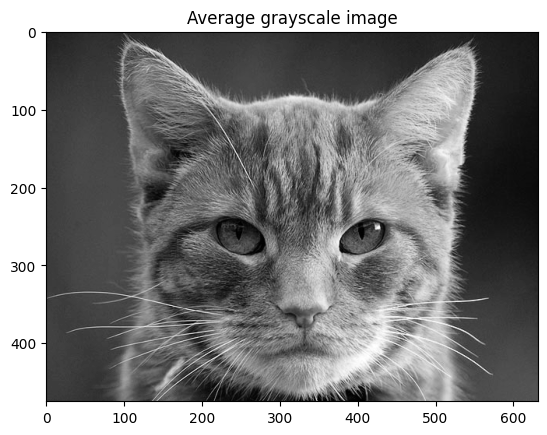

In [22]:
cat_image_r_normalized, cat_image_g_normalized, cat_image_b_normalized = [
    channel / 255 for channel in [cat_image_r, cat_image_g, cat_image_b]
] 
cat_image_gray = (cat_image_r_normalized + cat_image_g_normalized + cat_image_b_normalized) / 3.0  
plt.imshow(cat_image_gray, cmap = "gray")
plt.title("Average grayscale image")
plt.show()

The eye is more sensitive to greens than reds or blues. There are several ways to apply that correction, but we'll use [this one](https://stackoverflow.com/questions/14330/rgb-to-monochrome-conversion). This is called **luminance correction** (or **gamma correction**).

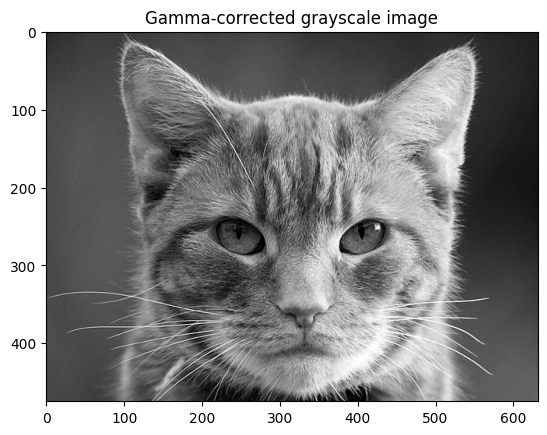

In [23]:
cat_image_gray_corrected = (0.299 * cat_image_r_normalized + 
                            0.587 * cat_image_g_normalized + 
                            0.114 * cat_image_b_normalized)
plt.gca().imshow(cat_image_gray_corrected, cmap = plt.cm.gray)
plt.title("Gamma-corrected grayscale image")
plt.show()

If we want to create an artistic grayscale image, we can always change the coefficients. Feel free to experiment with this.

So, there we go. We just performed matrix operations on images. Later, we'll talk about matrix multiplication and convolution, which is a very cool way of processing images.

For the time being, let's just try one more thing. The **image histogram** will give us information of how bright our image is. On the x-axis, there are pixel values from 0 to 255. On the y-axis, there is the count of all values, for example 10 pixels with value 0, 30 pixels with value 1 and so on.

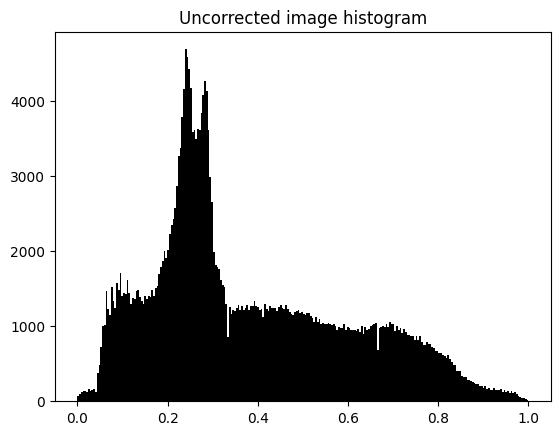

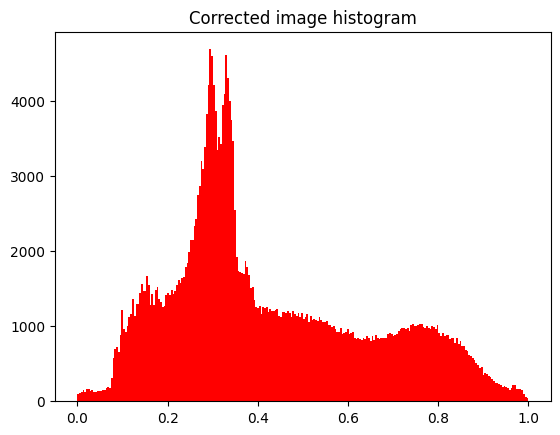

In [24]:
plt.hist(cat_image_gray.ravel(), bins = 256, color = "black")
plt.title("Uncorrected image histogram")
plt.show()
plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red")
plt.title("Corrected image histogram")
plt.show()

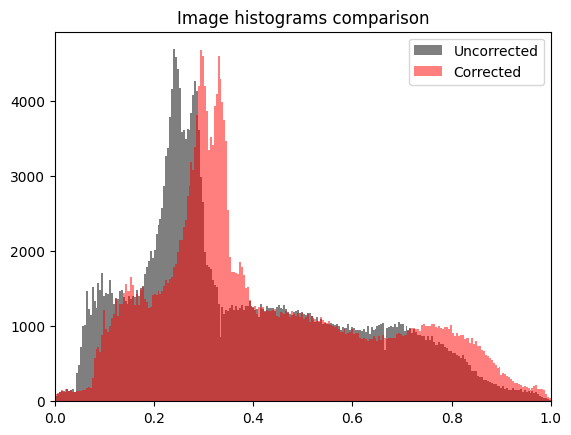

In [25]:
# Represent the image as a single-dimensional vector
hist_vector = cat_image_gray.ravel()

# Normalize the image to have values in the range [0; 1]
hist_vector = hist_vector / (hist_vector.max() - hist_vector.min())

plt.hist(hist_vector, bins = 256, color = "black", alpha = 0.5, label = "Uncorrected")
plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red", alpha = 0.5, label = "Corrected")
plt.xlim(0, 1)
plt.title("Image histograms comparison")
plt.legend()
plt.show()

**Your turn.** Using the code above, display each image channel (1 row, 3 columns). Below each channel, show the histogram corresponding to that channel. Use the previous code pieces as a reference.

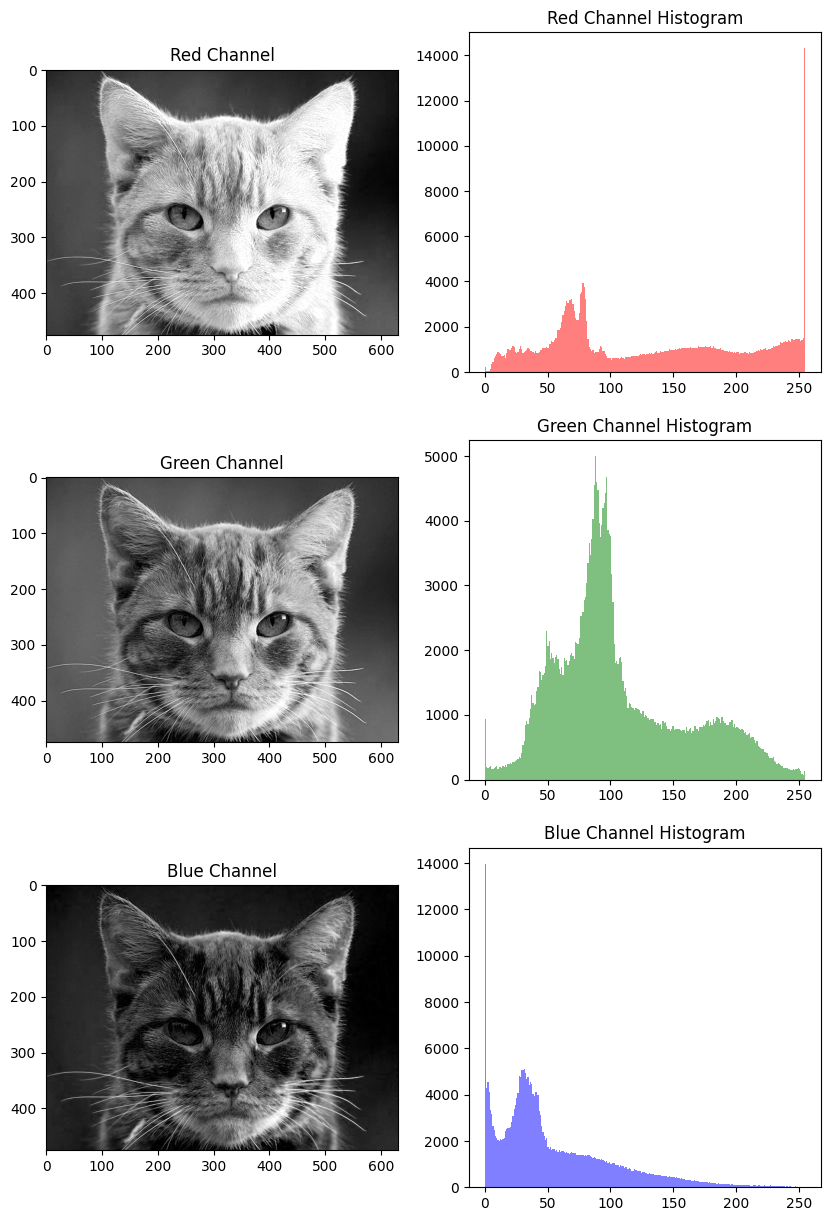

In [26]:
# Write your code here

def read_image(url):
    img = skimage.io.imread(url)
    return img

# Read the image
cat_image_url = "https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/140272627-grooming-needs-senior-cat-632x475.jpg"
cat_image = read_image(cat_image_url)

# Split image into RGB channels
cat_image_r, cat_image_g, cat_image_b = [cat_image[:, :, i] for i in range(3)]

# Create subplots for each channel and its histogram
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Display each channel
axes[0, 0].imshow(cat_image_r, cmap="gray")
axes[0, 0].set_title("Red Channel")
axes[1, 0].imshow(cat_image_g, cmap="gray")
axes[1, 0].set_title("Green Channel")
axes[2, 0].imshow(cat_image_b, cmap="gray")
axes[2, 0].set_title("Blue Channel")

# Plot histogram for each channel
axes[0, 1].hist(cat_image_r.ravel(), bins=256, color="red", alpha=0.5)
axes[0, 1].set_title("Red Channel Histogram")
axes[1, 1].hist(cat_image_g.ravel(), bins=256, color="green", alpha=0.5)
axes[1, 1].set_title("Green Channel Histogram")
axes[2, 1].hist(cat_image_b.ravel(), bins=256, color="blue", alpha=0.5)
axes[2, 1].set_title("Blue Channel Histogram")

plt.show()


### * Problem 5. Perspective Correction
Let's now look at transformations. A **homography** is a function that maps a pixel from one image onto a pixel from another image.

If a camera looks at an image, it can see a tilted, slanted and rotated version of the same image. It's easier to show than to tell:

<img src="perspective.gif" />

The camera sees a **transformed** version of the original image. Note, however, those things:
1. There's no translation (or if there is, it's irrelevant)
2. All lines in the object are lines in the image
3. Lines remain parallel and equally spaced

This means that the camera sees a **linear transformation** of the original object.

This transformation maps 2D space to 2D space which means its determinant is not zero. Which, in turn, means that we can **invert** the transformation matrix and see what the original image looks like.

We just transferred a problem in image processing to a problem in linear algebra.

This kind of processing has many uses. It allows us to align multiple images, it's also very useful in OCR (optical character recognition) software... and basically, it's a way to **standardize different perspectives**.

Since we are in 2D space, we need to find 2 basis vectors and then specify how we want to transform them.

Follow [this tutorial](http://www.learnopencv.com/homography-examples-using-opencv-python-c/) on OpenCV, a library for computer vision. You'll need to install it first.

**Note:** You can use the `read_image()` function to read the image, and `plt.imshow()` instead of `cv.imshow()`. It's simpler to use `OpenCV` just for finding the perspective correction matrix.

For more information about linear transformations on images in OpenCV, you can have a look at [this tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations).

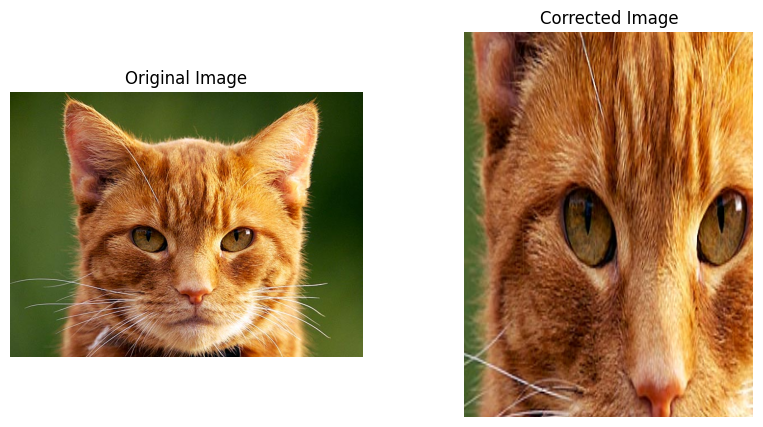

In [27]:
# Write your code here

def read_image(url):
    response = requests.get(url)
    if response.status_code == 200:
        img = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        return img
    else:
        print("Error: Failed to download image from URL.")
        return None

# Read the image from the URL
image_url = "https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/140272627-grooming-needs-senior-cat-632x475.jpg"
image = read_image(image_url)

# Check if the image was successfully loaded
if image is not None:
    # Define source points (points in the original image forming a rectangle)
    source_points = np.float32([[97, 146], [446, 150], [98, 375], [439, 373]])

    # Define destination points (points where the source points will be mapped to)
    destination_points = np.float32([[0, 0], [300, 0], [0, 400], [300, 400]])

    # Compute the perspective transformation matrix (homography)
    M = cv2.getPerspectiveTransform(source_points, destination_points)

    # Apply the perspective transformation to obtain the corrected image
    corrected_image = cv2.warpPerspective(image, M, (300, 400))

    # Display both the original and corrected images side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(corrected_image)
    plt.title('Corrected Image')
    plt.axis('off')

    plt.show()





# def read_image(url):
#     response = requests.get(url)
#     if response.status_code == 200:
#         img = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
#         return img
#     else:
#         print("Error: Failed to download image from URL.")
#         return None
# # Read the image from the URL
# image_url = "https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/140272627-grooming-needs-senior-cat-632x475.jpg"
# image = read_image(image_url)

# # Check if the image was successfully loaded
# if image is not None:
#     # Define source points (points in the original image forming a rectangle)
#     source_points = np.float32([[97, 146], [446, 150], [98, 375], [439, 373]])

#     # Define destination points (points where the source points will be mapped to)
#     destination_points = np.float32([[0, 0], [300, 0], [0, 400], [300, 400]])

#     # Compute the perspective transformation matrix (homography)
#     M = cv2.getPerspectiveTransform(source_points, destination_points)

#     # Apply the perspective transformation to obtain the corrected image
#     corrected_image = cv2.warpPerspective(image, M, (300, 400))

#     # Display the corrected image
#     plt.imshow(corrected_image)
#     plt.axis('off')
#     plt.title('Corrected Image')
#     plt.show()


### * Problem 6. Eigenvalues and Eigenvectors
Some transformations are special. Let's examine this visually.

Modify the code in the transformation visualization example. Instead of the two basis vectors, it should now accept **a vector as a parameter** and it should show that vector in the old and new coordinates. This should be simple enough to do :).

In [28]:
 # Write your code here
  
def visualize_transformed_vector(matrix, vec, title):
    """
    Shows the vector (starting at (0; 0)) before and after the transformation
    given by the specified matrix
    """
    vec = np.array(vec + [1])  # Convert to homogeneous coordinates
    
    # Transform the vector using matrix multiplication
    transformed_vec = np.dot(matrix, vec)
    transformed_vec = transformed_vec[:2] / transformed_vec[2]  # Convert back to Cartesian coordinates
    
    # Set up the plot
    plt.figure()
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Plot the original vector
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector')
    
    # Plot the transformed vector
    plt.quiver(0, 0, transformed_vec[0], transformed_vec[1], angles='xy', scale_units='xy', scale=1, color='red', label='Transformed Vector')
    
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.legend()
    plt.show()

Now have a look at the matrix given below:
$$ T = \begin{bmatrix}
2 & -4 \\
-1 & -1
\end{bmatrix} $$

See how the transformation acts on a arbitrary vector:

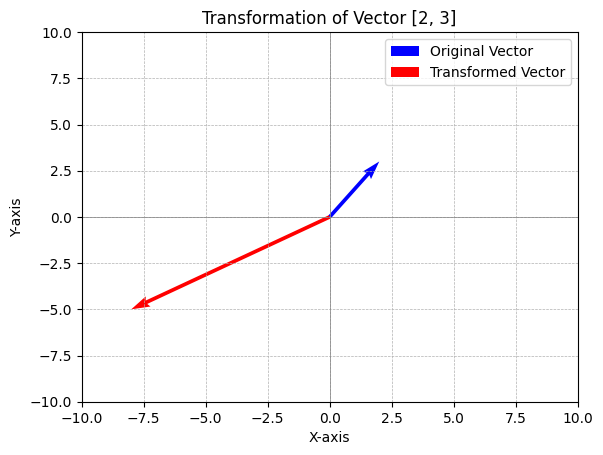

In [29]:
 # Given transformation matrix in homogeneous coordinates
matrix = np.array([[2, -4, 0],
                   [-1, -1, 0],
                   [0, 0, 1]])

# Test the function with the vector [2, 3]
visualize_transformed_vector(matrix, [2, 3], "Transformation of Vector [2, 3]")


Well, it... transforms it somehow. Let's try another vector:

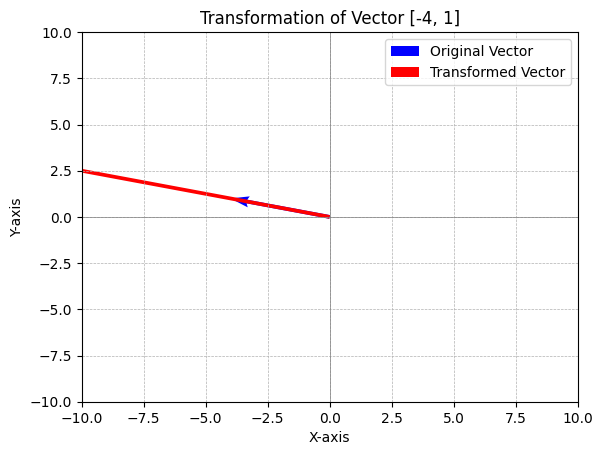

In [30]:
# Test the function with the vector [-4, 1]
visualize_transformed_vector(matrix, [-4, 1], "Transformation of Vector [-4, 1]")




Hm... the vector should be **scaled only**. That is, the entire matrix multiplication acts like a scalar multiplication for this special vector. Because it's so special, it's given a name - it's an **eigenvector** of that matrix. The factor which scales it is called an **eigenvalue** corresponding to that eigenvector.

More formally, a vector $v$ is an eigenvector of the matrix $A$, corresponding to the eigenvalue $\lambda$ if
$$ Av = \lambda v $$

You can find more details about the computation [here](https://www.calvin.edu/~scofield/courses/m256/materials/eigenstuff.pdf).

Why are these useful? For example, all of quantum physics is based on eigenvalues and eigenvectors. Also, it's very useful in **dimensionality reduction** problems. If you wish, you can explore that (for example, the principal component analysis algorithm).

### ** Problem 7. Principal Component Analysis
Sometimes a projection of a higher-dimensional to a lower-dimensional space is useful. It's extremely useful if we want to get some visual understanding of a, say, 15D space, in 3D or even 2D. One algorithm which allows us to project multidimensional data into fewer dimensions **while keeping the most important shapes and structures** is called **principal component analysis** (PCA). You can explore this using the following checklist:
* What are eigenvalues and eigenvectors?
* What is the eigenbasis? What is the spectrum of a matrix?
* How do we compute the eigenvalues and eigenvectors of a matrix?
* What is projection?
* How does projection conserve some shapes? Think about an object casting a shadow
* How is the projection problem related to eigenvalues and eigenvectors?
* What is PCA?
* What are principal components? How many components are there (as a function of dimensions of the original space)?
* What is variance? What is explained variance?
* How do principal components relate to explained variance?
* How is PCA implemented? Implement and show
* Show some applications of PCA, e.g. reducing a 3D image to its first 2 principal components, plotting the 3D and 2D images
* Show a practical use of PCA, for example, trying to see features in a 15D space, projected in 3D.


# What are eigenvalues and eigenvectors?
* Eigenvalues and Eigenvectors:
    Eigenvalues and eigenvectors are concepts from linear algebra.
    An eigenvector of a square matrix is a non-zero vector that, when multiplied by the matrix, remains parallel to the original vector.
    The corresponding scalar value that scales the eigenvector is called the eigenvalue.


  https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors 

# What is the eigenbasis? What is the spectrum of a matrix? 
* Eigenbasis and Spectrum:
    The eigenbasis of a matrix consists of its eigenvectors.
    The spectrum of a matrix refers to the set of its eigenvalues.
  * https://people.math.harvard.edu/~knill/teaching/math22b2019/handouts/lecture17.pdf
  * https://math.stackexchange.com/questions/2202839/changing-the-spectrum-of-a-matrix-while-preserving-its-eigenvectors
  * https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix

# How do we compute the eigenvalues and eigenvectors of a matrix?

To compute the eigenvalues and eigenvectors of a matrix, you typically use numerical algorithms. Here's a step-by-step guide on how to compute them:

1. **Determine the Matrix**: Let $$ \ A \ $$ be the square matrix for which you want to find eigenvalues and eigenvectors.

2. **Form the Characteristic Equation**: The characteristic equation of \( A \) is given by:
$$ \text{det}(A - \lambda I) = 0 \ $$  where $$ \lambda \ $$ is the eigenvalue, $$ \ I \ $$ is the identity matrix, and $$ \text{det} \ $$ denotes the determinant.

4. **Solve the Characteristic Equation**: Solve the characteristic equation to find the eigenvalues $$  \lambda_1, \lambda_2, \ldots, \lambda_n \ $$  of the matrix $$ \ A \ $$.

5. **Find Eigenvectors for Each Eigenvalue**: For each eigenvalue $$\( \lambda_i \)$$, solve the equation:
$$\[ (A - \lambda_i I) \mathbf{v}_i = \mathbf{0} \]$$ where $$\( \mathbf{v}_i \)$$ is the corresponding eigenvector.

6. **Normalize Eigenvectors**: Normalize each eigenvector $$\( \mathbf{v}_i \)$$ to have unit length if required.

Numerical algorithms like the QR algorithm, the power iteration method, or the Jacobi eigenvalue algorithm are commonly used to compute eigenvalues and eigenvectors. Libraries like NumPy and SciPy in Python provide efficient implementations of these algorithms.



In [31]:

# Define a square matrix
A = np.array([[2, 1],
              [1, 3]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Print eigenvalues and eigenvectors
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


Eigenvalues: [1.38196601 3.61803399]
Eigenvectors: [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


# What is projection?
Projection in the context of component analysis, such as Principal Component Analysis (PCA), refers to the transformation of data onto a lower-dimensional subspace while preserving the maximum amount of variance in the original data.

In PCA, projection involves mapping the original data points onto a set of orthogonal axes called principal components. These principal components are eigenvectors of the covariance matrix of the data and represent the directions of maximum variance. 

The projection of a data point onto the principal components results in a new set of coordinates in the reduced-dimensional space. These coordinates are often referred to as scores or coefficients and represent the contribution of each principal component to the original data point.

Mathematically, given a data point \( \mathbf{x} \) and a set of \( k \) principal components \( \mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_k \), the projection \( \mathbf{y} \) of \( \mathbf{x} \) onto the principal components is computed as:

\[
\mathbf{y} = (\mathbf{x} - \bar{\mathbf{x}}) \cdot \mathbf{V}
\]

where \( \bar{\mathbf{x}} \) is the mean of the data, \( \mathbf{V} \) is a matrix whose columns are the principal components, and \( \cdot \) represents the dot product.

This formula computes the projection \( \mathbf{y} \) of \( \mathbf{x} \) onto the principal components.



The result of the projection is a lower-dimensional representation of the original data that captures most of the variability in the data. This reduced representation is useful for tasks such as visualization, dimensionality reduction, and feature extraction.

# How does projection conserve some shapes? Think about an object casting a shadow
When we talk about projection conserving some shapes, we're typically referring to the idea that certain geometric properties are preserved when an object is projected onto a lower-dimensional space. This concept can be understood through the analogy of an object casting a shadow.

Consider an object in three-dimensional space casting a shadow onto a two-dimensional surface. The shadow is essentially a projection of the object onto the surface. Despite the reduction in dimensionality, certain aspects of the object's shape are preserved in the shadow:

1. **Overall Form**: The general form or silhouette of the object is retained in the shadow. For example, if the object is spherical, its shadow will appear as a circle.

2. **Relative Proportions**: The relative sizes and proportions of different parts of the object are maintained in the shadow. For instance, if one part of the object is twice as large as another, this relationship will be reflected in the shadow.

3. **Orientation**: The orientation or orientation changes of the object are preserved in the shadow. If the object is rotated or tilted, the corresponding changes will be visible in the shadow.

Similarly, in mathematical projection techniques like PCA, certain geometric properties of the original data are conserved in the projected space. For example, the distances and angles between data points may be preserved or approximately preserved in the lower-dimensional space, depending on the specific projection method used.

In essence, projection techniques aim to capture the essential structure or variability of the original data while reducing its dimensionality. This enables meaningful analysis and visualization while retaining important geometric properties.

# How is the projection problem related to eigenvalues and eigenvectors?
The projection problem is closely related to eigenvalues and eigenvectors, particularly in the context of Principal Component Analysis (PCA) and other dimensionality reduction techniques.

In PCA, the goal is to find a lower-dimensional subspace onto which the original high-dimensional data can be projected while preserving the maximum amount of variance. This projection is achieved by identifying the principal components of the data, which are the eigenvectors of the covariance matrix.

Here's how eigenvalues and eigenvectors are involved in the projection problem:

1. **Eigenvalues**: Eigenvalues represent the amount of variance captured by each principal component. In PCA, the eigenvalues of the covariance matrix indicate the importance of each principal component. Higher eigenvalues correspond to principal components that capture more variance in the data. Thus, when selecting a subset of principal components for projection, we often prioritize those with the highest eigenvalues to retain the most information.

2. **Eigenvectors**: Eigenvectors represent the directions of maximum variance in the data. In PCA, the eigenvectors of the covariance matrix define the principal components, which form an orthogonal basis for the lower-dimensional subspace onto which the data will be projected. Each eigenvector represents a principal component, and the corresponding eigenvalue indicates the importance of that component.

When we perform the projection of the original data onto the principal components, we essentially compute the dot product between the data points and the eigenvectors. This dot product operation effectively projects the data onto the subspace spanned by the principal components, resulting in a lower-dimensional representation while preserving the most significant variations in the data.

In summary, eigenvalues and eigenvectors play a crucial role in PCA and related projection techniques by providing a principled way to identify the most important directions in the data and project it onto a lower-dimensional space while maximizing the retained variance.

# What is PCA ?
Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction and data visualization. It's widely used in various fields such as machine learning, image processing, and finance for simplifying complex datasets while preserving important information.

PCA works by transforming high-dimensional data into a lower-dimensional representation, capturing the most significant variations in the data. It does this by identifying a set of orthogonal axes called principal components, which are linear combinations of the original features.

Here's an overview of how PCA works:

1. **Standardization**: The first step in PCA is often to standardize the data to have a mean of zero and a standard deviation of one. This ensures that each feature contributes equally to the analysis.

2. **Covariance Matrix**: PCA calculates the covariance matrix of the standardized data. The covariance matrix describes the relationships between pairs of features, indicating how they vary together.

3. **Eigenvalue Decomposition**: PCA then performs eigenvalue decomposition on the covariance matrix to find its eigenvectors and eigenvalues. The eigenvectors represent the directions of maximum variance in the data, while the eigenvalues indicate the amount of variance explained by each eigenvector.

4. **Selection of Principal Components**: The eigenvectors are sorted based on their corresponding eigenvalues, and the top \( k \) eigenvectors (principal components) are selected to form a new subspace of dimensionality \( k \). Typically, the principal components are chosen such that they explain a significant portion of the variance in the data, often above a certain threshold (e.g., 90% of the variance).

5. **Projection**: Finally, the original high-dimensional data is projected onto the subspace spanned by the selected principal components. This projection results in a lower-dimensional representation of the data, where each observation is represented by a set of coefficients corresponding to the principal components.

PCA can be used for various purposes, including:

- Dimensionality reduction: Reducing the number of features while preserving most of the variability in the data.
- Data visualization: Visualizing high-dimensional data in two or three dimensions for easier interpretation.
- Noise reduction: Removing noise or irrelevant features from the data.
- Feature extraction: Identifying the most important features or patterns in the data.

Overall, PCA is a powerful tool for understanding and simplifying complex datasets, making it a valuable technique in data analysis and machine learning.

# What are principal components? How many components are there (as a function of dimensions of the original space)?
Principal components are the orthogonal axes in the feature space along which the data varies the most. In other words, they represent the directions of maximum variance in the data. Each principal component is a linear combination of the original features, and together they form a new basis for the data.

In a dataset with \( n \) observations and \( d \) features, there can be at most \( \min(n-1, d) \) principal components. However, the number of principal components is typically limited by the dimensionality of the original space.

For example:

- If \( n \) (the number of observations) is greater than \( d \) (the number of features), there will be \( d \) principal components, as there are more dimensions in the feature space than observations.

- If \( n \) is less than or equal to \( d \), there will be at most \( n-1 \) principal components, as there are fewer observations than dimensions in the feature space.

In general, the number of principal components is determined by the dimensionality of the original space and the amount of variability in the data. PCA aims to capture as much of the variability in the data as possible while reducing the dimensionality, so the number of principal components selected is often based on criteria such as retaining a certain percentage of the variance (e.g., 90% of the variance).

# What is variance? What is explained variance?
Variance is a measure of the dispersion or spread of a set of data points around their mean. It quantifies how much the data values deviate from the mean value. Mathematically, the variance of a dataset \( X \) with \( n \) observations is calculated as:

$$ \text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 \ $$

where $ x_i $ represents each individual data point,  $ \bar{x}\ $  is the mean of the dataset, and  $$ \sum \$$ denotes the summation over all data points.Explained variance, in the context of Principal Component Analysis (PCA) or other dimensionality reduction techniques, refers to the proportion of total variance in the data that is captured or "explained" by each principal component. It measures how much information each principal component retains from the original dataset.

When performing PCA, the eigenvalues of the covariance matrix represent the variance of the data along each principal component. The explained variance of each principal component is then calculated by dividing its eigenvalue by the sum of all eigenvalues. This provides a measure of the proportion of total variance explained by each principal component.

Explained variance is useful for understanding how much information is retained after reducing the dimensionality of the dataset. By selecting a subset of principal components that capture a significant portion of the total variance (e.g., 90% or 95%), we can effectively reduce the dimensionality of the data while retaining most of its important information. This allows for simplified analysis, visualization, and modeling of high-dimensional datasets.

#  Principal components and explained variance are closely related concepts in Principal Component Analysis (PCA).

In PCA, principal components are the orthogonal axes in the feature space along which the data varies the most. Each principal component is a linear combination of the original features and captures a certain amount of variability in the data.

Explained variance, on the other hand, refers to the proportion of total variance in the data that is captured or "explained" by each principal component. It measures how much information each principal component retains from the original dataset.

The relationship between principal components and explained variance can be summarized as follows:

1. **Eigenvalues**: In PCA, the eigenvalues of the covariance matrix represent the variance of the data along each principal component. The larger the eigenvalue associated with a principal component, the more variance that component captures in the data.

2. **Cumulative Explained Variance**: The cumulative explained variance is the sum of the explained variance of all principal components up to a certain component. It represents the total amount of variance in the data that is captured by those components. By calculating the cumulative explained variance, we can determine how many principal components are needed to retain a desired amount of variance in the data.

3. **Selection of Principal Components**: When selecting the number of principal components to retain for dimensionality reduction or analysis, one common approach is to choose the smallest number of components that collectively explain a high percentage (e.g., 90% or 95%) of the total variance in the data. This ensures that most of the important information in the original dataset is preserved while reducing its dimensionality.

In summary, principal components capture the variability in the data along different directions, while explained variance quantifies how much of that variability is retained by each principal component. Together, they provide insights into the structure and information content of the dataset and guide the selection of the appropriate number of principal components for analysis or visualization.

Principal components and explained variance are closely related concepts in Principal Component Analysis (PCA).

In PCA, principal components are the orthogonal axes in the feature space along which the data varies the most. Each principal component is a linear combination of the original features and captures a certain amount of variability in the data.

Explained variance, on the other hand, refers to the proportion of total variance in the data that is captured or "explained" by each principal component. It measures how much information each principal component retains from the original dataset.

The relationship between principal components and explained variance can be summarized as follows:

1. **Eigenvalues**: In PCA, the eigenvalues of the covariance matrix represent the variance of the data along each principal component. The larger the eigenvalue associated with a principal component, the more variance that component captures in the data.

2. **Cumulative Explained Variance**: The cumulative explained variance is the sum of the explained variance of all principal components up to a certain component. It represents the total amount of variance in the data that is captured by those components. By calculating the cumulative explained variance, we can determine how many principal components are needed to retain a desired amount of variance in the data.

3. **Selection of Principal Components**: When selecting the number of principal components to retain for dimensionality reduction or analysis, one common approach is to choose the smallest number of components that collectively explain a high percentage (e.g., 90% or 95%) of the total variance in the data. This ensures that most of the important information in the original dataset is preserved while reducing its dimensionality.

In summary, principal components capture the variability in the data along different directions, while explained variance quantifies how much of that variability is retained by each principal component. Together, they provide insights into the structure and information content of the dataset and guide the selection of the appropriate number of principal components for analysis or visualization.

### ** Problem 8. Eigenfaces
Another great use of eigenvalues and eigenvectors can be **feature detection**. In one algorithm, called **eigenfaces**, if you receive many images of faces, you can see "what makes a face". The principal characteristics of a face can be extracted using something similar to PCA.

You can see more info about the topic [at Wikipedia](https://en.wikipedia.org/wiki/Eigenface).

Use the checklist from above, but add information about the "eigenfaces" algorithm.
* How are images represented?
* How are the images transformed?
* What is an eigenface? Why does it look like a typical (albeit blurry) face?
* Implement the algorithm
* Train the algorithm on some face images
* Show what the eigenfaces you got look like
* Use the algorithm for face detection **in an unknown image**

### ** Problem 9. Clustering Analysis. How Different Metrics Affect Clustering Results
One important application of linear algebra is to calculate distances between two points. There are many different ways to calculate a distance. The one which is probably most familiar to you is the **Euclidean distance**. In 2D space, given points $A (x_A; y_A)$ and $B(x_B; y_B)$, the distance is 
$$ d = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2} = \sqrt{(\Delta x)^2 + (\Delta y)^2} $$

There are many more definitions of distance (see for example "taxicab distance").

Many algorithms in data processing and machine learning depend on calculating distances, mainly for calculating errors. A class of algorithms which is based on distances is called **cluster analysis**. Explore what cluster analysis is, and how different distance metrics (e.g. Eucledian and its derivate metrics, taxicab, hexagonal, octagonal, etc.) affect the quality of clustering. Of course, the type of metric you're going to use depends mostly on the data. Explore different scenarios and see why one is better than the other in a particular case.

* What are clusters of points? Why does real-world data tend to clusterize?
* What is clustering analysis? (Optional: What is unsupervised learning?)
* Provide examples of clustering analysis in 2D
* How are clusters defined?
* What is k-means clustering? Why does it converge?
* How does k-means depend on the initialization?
* How can we reduce the dependency on the initialization?
* What is agglomerative clustering (also called hierarchical clustering)?
* Implement (or use a ready-made implementation) k-means and agglomerative clustering
* The algorithms heavily depend on calculating distances between points. Show the results first using the Euclidean metric
* Use another metric (or several other metrics). Compare the results
* Use a custom metric. For example, this might be a function defined manually
* In which cases is a custom metric applicable?
* Apply clustering analysis for a real-world scenario. Some applications include social graphs (relations among people) of all sorts, connected crimes and classification.
* Use different distance metrics on the same dataset. How does it affect the data in general?